# Import Dependencies

In [78]:
import torch 
from astroNN.datasets.galaxy10 import galaxy10cls_lookup  
import h5py
import numpy as np
import wget
import os
from sklearn.model_selection import train_test_split
from PIL import Image
from matplotlib import cm
import matplotlib.pyplot as plt
import random
from PIL import Image as im
import shutil
import winshell

# Check GPU

In [2]:
print(f'PyTorch version: {torch.__version__}')
print(f'_CUDA version: ')
!nvcc --version
print(f'CUDNN version: {torch.backends.cudnn.version()}')
print(f'Available GPU devices: {torch.cuda.device_count()}')
print(f'Device Name: {torch.cuda.get_device_name()}')

PyTorch version: 1.13.0+cu117
_CUDA version: 
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Jun__8_16:59:34_Pacific_Daylight_Time_2022
Cuda compilation tools, release 11.7, V11.7.99
Build cuda_11.7.r11.7/compiler.31442593_0
CUDNN version: 8500
Available GPU devices: 1
Device Name: NVIDIA GeForce RTX 3060 Ti


# Download Astronomy Image Dataset

In [3]:
#Change data path for your device. Requires 2.6 GB of space available
data_path = "S:/galaxydata/Galaxy10_DECals.h5"
if not os.path.isfile(data_path):
    wget.download("https://www.astro.utoronto.ca/~hleung/shared/Galaxy10/Galaxy10_DECals.h5", data_path)

with h5py.File(data_path, 'r') as f:
    images = np.array(f['images'])
    labels = np.array(f['ans'])

In [4]:
classes = []
for i in range(10):
    classes.append(galaxy10cls_lookup(i))

# Visualize galaxy images

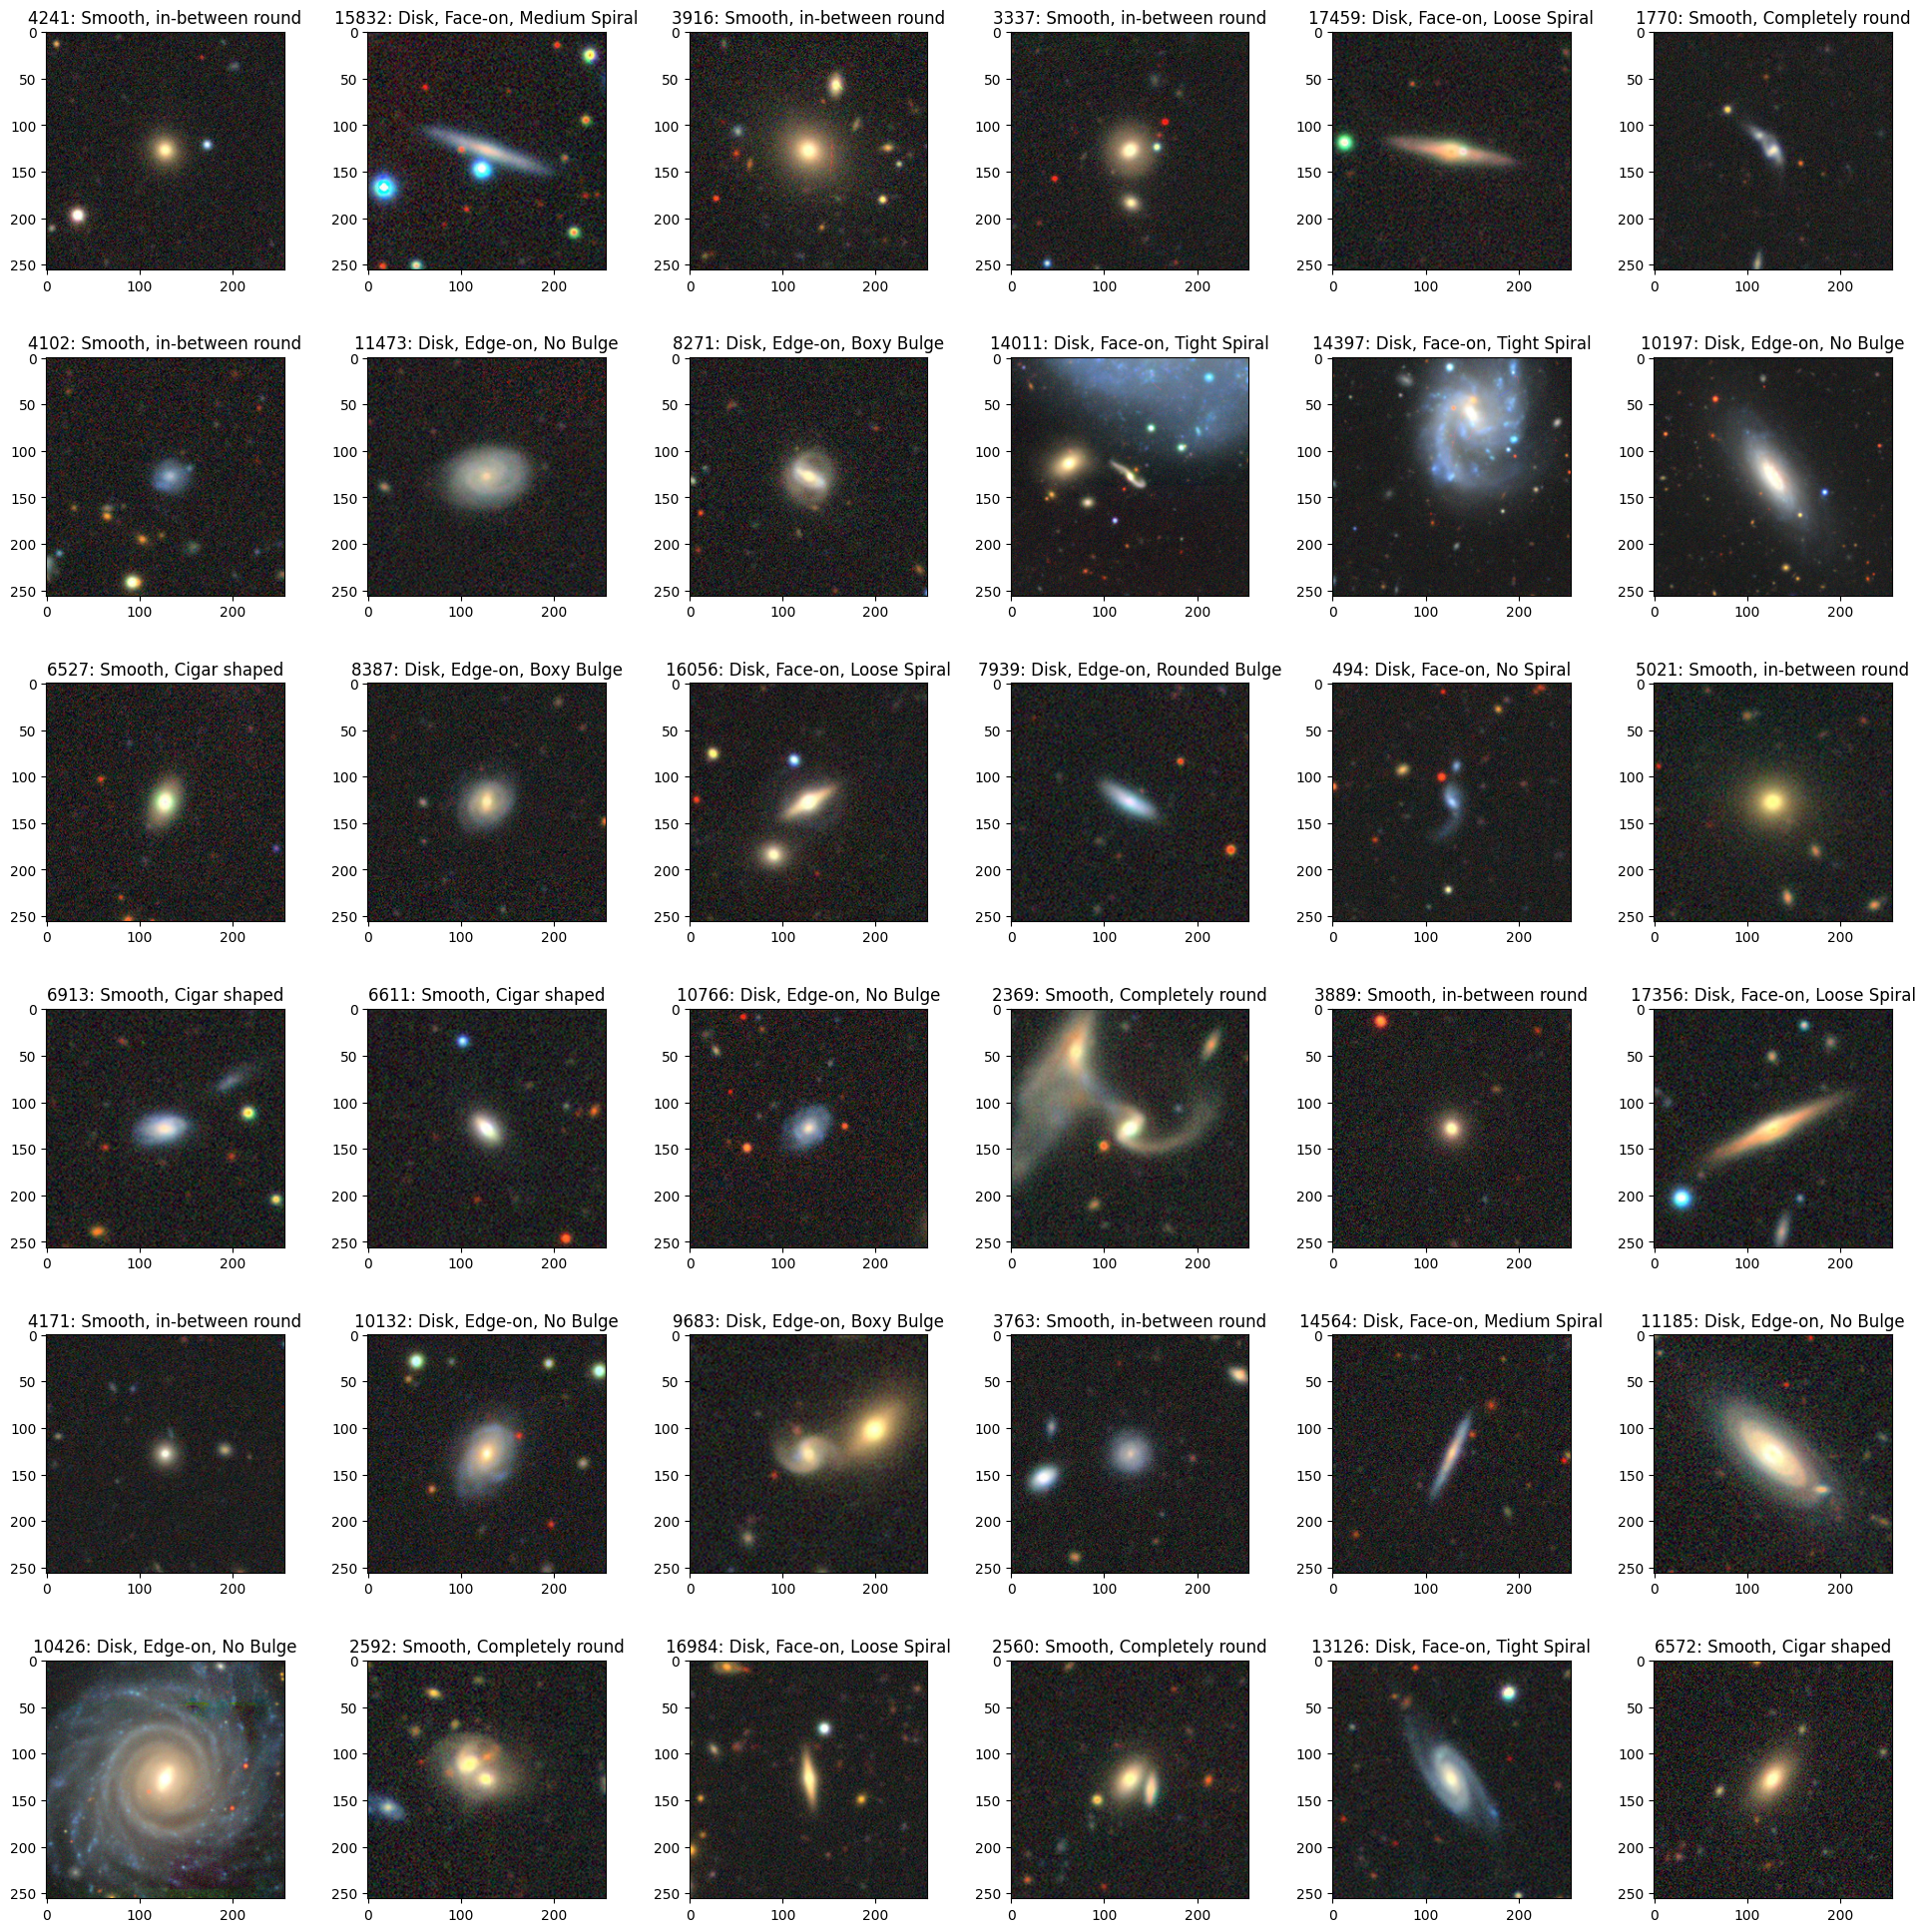

In [5]:
fig = plt.figure(figsize=(20,20)) 
for i in range(36):
    num = random.randrange(0, len(images))
    plt.subplot(6,6,i+1)    
    plt.imshow(images[num])
    plt.title(str(num) + ": " + classes[labels[num]] )
    fig.tight_layout(pad=3.0)
    
plt.show()

5483: Smooth, in-between round


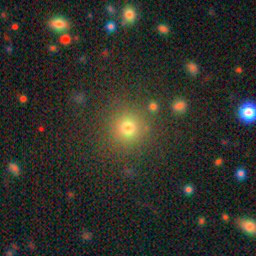

In [6]:
rand = random.randrange(0, len(images))

numpy_image = images[rand]
PIL_image = Image.fromarray(np.uint8(numpy_image)).convert('RGB')
print(str(rand) + ": " + classes[labels[rand]])

PIL_image

# Create Folders for Data

In [66]:
if not os.path.isdir("S:/galaxydata/data"):
    os.mkdir("S:/galaxydata/data")
    os.mkdir("S:/galaxydata/data/train")
    os.mkdir("S:/galaxydata/data/test")
    os.mkdir("S:/galaxydata/data/full")

    for i in classes:
        os.mkdir("S:/galaxydata/data/train/" + str(i))
        os.mkdir("S:/galaxydata/data/test/" + str(i))
        os.mkdir("S:/galaxydata/data/full/" + str(i))

In [67]:
#Get class names 
classes

['Disk, Face-on, No Spiral',
 'Smooth, Completely round',
 'Smooth, in-between round',
 'Smooth, Cigar shaped',
 'Disk, Edge-on, Rounded Bulge',
 'Disk, Edge-on, Boxy Bulge',
 'Disk, Edge-on, No Bulge',
 'Disk, Face-on, Tight Spiral',
 'Disk, Face-on, Medium Spiral',
 'Disk, Face-on, Loose Spiral']

In [68]:
#Get number of instances per class
unique, counts = np.unique(labels, return_counts=True)
print(np.asarray((classes, counts)).T)

[['Disk, Face-on, No Spiral' '1081']
 ['Smooth, Completely round' '1853']
 ['Smooth, in-between round' '2645']
 ['Smooth, Cigar shaped' '2027']
 ['Disk, Edge-on, Rounded Bulge' '334']
 ['Disk, Edge-on, Boxy Bulge' '2043']
 ['Disk, Edge-on, No Bulge' '1829']
 ['Disk, Face-on, Tight Spiral' '2628']
 ['Disk, Face-on, Medium Spiral' '1423']
 ['Disk, Face-on, Loose Spiral' '1873']]


In [69]:
counts

array([1081, 1853, 2645, 2027,  334, 2043, 1829, 2628, 1423, 1873],
      dtype=int64)

# Save images to folders created. 

### Takes 4 parameters: 
#### split: data split (train or test)
#### images: takes image arrays from Galaxy_DECals.h5 file
#### labels: takes labels from Galaxy_DECals.h5 file
#### num: number of instances per folder 

In [56]:
def save_image(split, images, labels, num):
    minimum = 0
    for i in np.unique(labels):
        x = 0
        unique, count = np.unique(labels, return_counts=True)
        while(x < num and x < count[i]):
            maximum = minimum + count[i]
            rand = random.randrange(minimum, maximum)
            numpy_image = images[rand]
            # PIL_image = Image.fromarray(np.uint8(numpy_image)).convert('RGB')
            image = Image.fromarray(numpy_image.astype('uint8'), 'RGB')
            image = image.save("S:/galaxydata/data/" + split + "/" + classes[i] + "/" + str(rand) + ".jpg")
            x += 1
        minimum = maximum

# num = 400
# save_image("train", images, labels, num*0.8)
# save_image("test", images, labels, num*0.2)

In [70]:
def save_all_images(images, labels):
    for i in range(len(images)):
        label = classes[labels[i]]
        image = Image.fromarray(images[i].astype('uint8'), 'RGB')
        image = image.save("S:/galaxydata/data/full/" + label + "/" + str(i) + ".jpg")   
    
    subfolders = []
    for subdir, dirs, files in os.walk("S:/galaxydata/data/full"):
        subfolders.append(subdir)
    
    subfolders = subfolders[1:]
    for i in subfolders:
        lst = os.listdir(i)
        train_images, test_images= train_test_split(lst, test_size=0.2)
        path, label = os.path.split(i)
        for train in train_images:
            image = im.open(f"{i}" + "/" + train)
            image = image.save("S:/galaxydata/data/train/" + label + "/" + train)
        for test in test_images:
            image = im.open(f"{i}" + "/" + test)
            image = image.save("S:/galaxydata/data/test/" + label + "/" + test)
# save_all_images(images, labels)

In [71]:
save_all_images(images, labels)

We incorporate an 80/20 split for train/test datasets by multiplying num by 0.8 and 0.2, respectively.

In [ ]:
shutil.rmtree("S:/galaxydata/data/train/Disk, Edge-on, Rounded Bulge")
shutil.rmtree("S:/galaxydata/data/test/Disk, Edge-on, Rounded Bulge")
shutil.rmtree("S:/galaxydata/data/full/Disk, Edge-on, Rounded Bulge")

# winshell.recycle_bin().empty(confirm=False, show_progress=False, sound=False)

We delete the Disk, Edge-on, Rounded Bulge class because of its small size

# Print starting and ending indices for each class

In [77]:
directory = "S:/galaxydata/data/train/Disk, Edge-on, Rounded Bulge"
lst = os.listdir(directory)
print(len(lst))

267


In [31]:
minimum = 0
for i in np.unique(labels):
    x = 0
    unique, counts = np.unique(labels, return_counts=True)
    num = 1
    while(x < num):
        maximum = minimum + counts[i]
        print(str(classes[i]) + ": " + str(minimum) + "-" + str(maximum))
        rand = random.randrange(minimum, maximum)
        x += 1
    minimum = maximum
    print("--------------------------------------------------")

Disk, Face-on, No Spiral: 0-1081
--------------------------------------------------
Smooth, Completely round: 1081-2934
--------------------------------------------------
Smooth, in-between round: 2934-5579
--------------------------------------------------
Smooth, Cigar shaped: 5579-7606
--------------------------------------------------
Disk, Edge-on, Rounded Bulge: 7606-7940
--------------------------------------------------
Disk, Edge-on, Boxy Bulge: 7940-9983
--------------------------------------------------
Disk, Edge-on, No Bulge: 9983-11812
--------------------------------------------------
Disk, Face-on, Tight Spiral: 11812-14440
--------------------------------------------------
Disk, Face-on, Medium Spiral: 14440-15863
--------------------------------------------------
Disk, Face-on, Loose Spiral: 15863-17736
--------------------------------------------------


In [24]:
# import shutil
# import winshell

# shutil.rmtree("S:/galaxydata/data")
# winshell.recycle_bin().empty(confirm=False, show_progress=False, sound=False)